In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [27]:
!kaggle datasets list -s ['advertising and sales']

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sazid28/advertising.csv                                   Advertising and Sales                               2KB  2018-01-11 16:47:19           9986         55  0.29411766       
yasserh/advertising-sales-dataset                         Advertising Sales Dataset                           2KB  2021-12-25 13:56:21           5878         48  1.0              
ishaanthareja007/company-sales                            company sales                                       2KB  2021-12-30 13:48:42           2110         33  0.8235294        
uniabhi/bigmart-sales-data                                BigMart Sales Data                        

In [23]:
!kaggle datasets list -h

usage: kaggle datasets list [-h] [--sort-by SORT_BY] [--size SIZE] [--file-type FILE_TYPE]
                            [--license LICENSE_NAME] [--tags TAG_IDS] [-s SEARCH] [-m]
                            [--user USER] [-p PAGE] [-v] [--max-size MAX_SIZE]
                            [--min-size MIN_SIZE]

options:
  -h, --help            show this help message and exit
  --sort-by SORT_BY     Sort list results. Default is 'hottest'. Valid options are 'hottest', 'votes', 'updated', and 'active'
  --size SIZE           DEPRECATED. Please use --max-size and --min-size to filter dataset sizes.
  --file-type FILE_TYPE
                        Search for datasets with a specific file type. Default is 'all'. Valid options are 'all', 'csv', 'sqlite', 'json', and 'bigQuery'. Please note that bigQuery datasets cannot be downloaded
  --license LICENSE_NAME
                        Search for datasets with a specific license. Default is 'all'. Valid options are 'all', 'cc', 'gpl', 'odb', and 'other

In [28]:
!kaggle datasets list -s ['advertising and sales'] --sort-by 'votes'

ref                                                     title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
harrimansaragih/dummy-advertising-and-sales-data        Dummy Marketing and Sales Data                       93KB  2021-03-12 00:09:03           9395        110  1.0              
tejashvi14/travel-insurance-prediction-data             Travel Insurance Prediction Data                     13KB  2021-08-23 05:22:22           8827        108  1.0              
sazid28/advertising.csv                                 Advertising and Sales                                 2KB  2018-01-11 16:47:19           9986         55  0.29411766       
loveall/email-campaign-management-for-sme               Email Campaign Management for SME           

In [7]:
!kaggle datasets download -d harrimansaragih/dummy-advertising-and-sales-data

  0% 0.00/92.7k [00:00<?, ?B/s]
100% 92.7k/92.7k [00:00<00:00, 94.4MB/s]


In [8]:
!mkdir /content/data

In [10]:
!unzip dummy-advertising-and-sales-data.zip -d data

Archive:  dummy-advertising-and-sales-data.zip
  inflating: data/Dummy Data HSS.csv  


In [106]:
raw_data = pd.read_csv('/content/data/Dummy Data HSS.csv')

In [107]:
raw_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [108]:
raw_data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [109]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [110]:
data = raw_data.dropna(how = 'all')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [111]:
data = data[data['Sales'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4556 non-null   float64
 1   Radio         4562 non-null   float64
 2   Social Media  4560 non-null   float64
 3   Influencer    4566 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.0+ KB


In [112]:
data['Social Media'].fillna(data.groupby("Influencer")['Social Media'].transform("mean"), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4556 non-null   float64
 1   Radio         4562 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4566 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.0+ KB


<ipython-input-112-97fbbdd68dcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Social Media'].fillna(data.groupby("Influencer")['Social Media'].transform("mean"), inplace=True)


In [113]:
data['TV'].fillna(data['TV'].mean(), inplace=True)
data['Radio'].fillna(data['TV'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4566 non-null   float64
 1   Radio         4566 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4566 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.0+ KB


<ipython-input-113-4420d7254a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TV'].fillna(data['TV'].mean(), inplace=True)
<ipython-input-113-4420d7254a55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Radio'].fillna(data['TV'].mean(), inplace=True)


In [114]:
data['Influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [115]:
data['Influencer'] = data['Influencer'].replace(['Mega', 'Micro', 'Nano', 'Macro'],['4','3','1','2'])
data.head()

<ipython-input-115-c33e38913910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Influencer'] = data['Influencer'].replace(['Mega', 'Micro', 'Nano', 'Macro'],['4','3','1','2'])


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,3,56.594181


In [116]:
data['Influencer'].dtype

dtype('O')

In [143]:
data['Influencer'] = data['Influencer'].astype(np.float64)

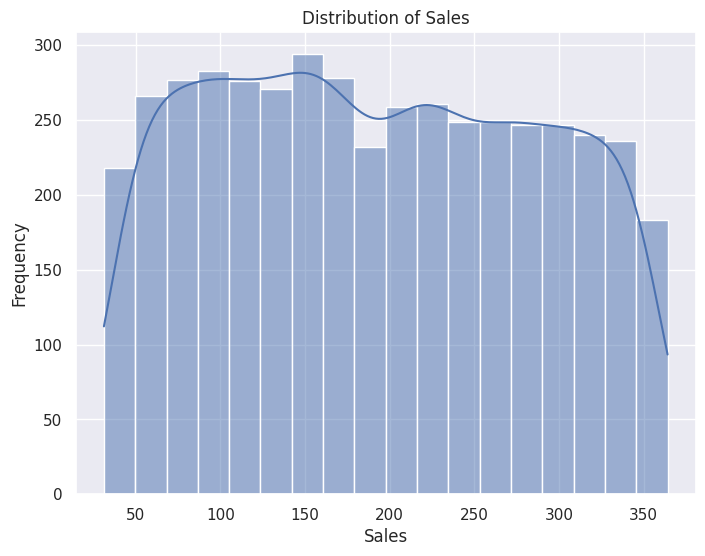

In [118]:
#Freedman-Diaconis rule
q1 = data['Sales'].quantile(0.25)
q3 = data['Sales'].quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(data['Sales']) ** (1 / 3))
bin_count = int(np.ceil((data['Sales'].max() - data['Sales'].min()) / bin_width))

plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], bins=bin_count, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

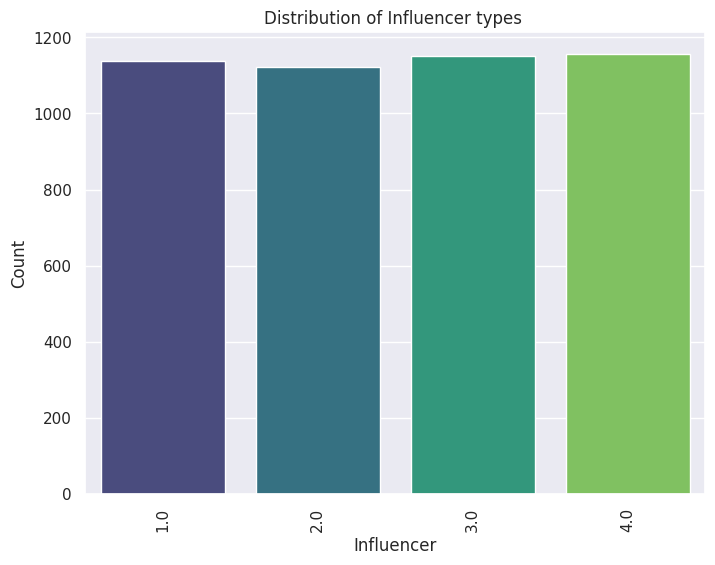

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Influencer', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Influencer')
plt.ylabel('Count')
plt.title('Distribution of Influencer types ')
plt.show()

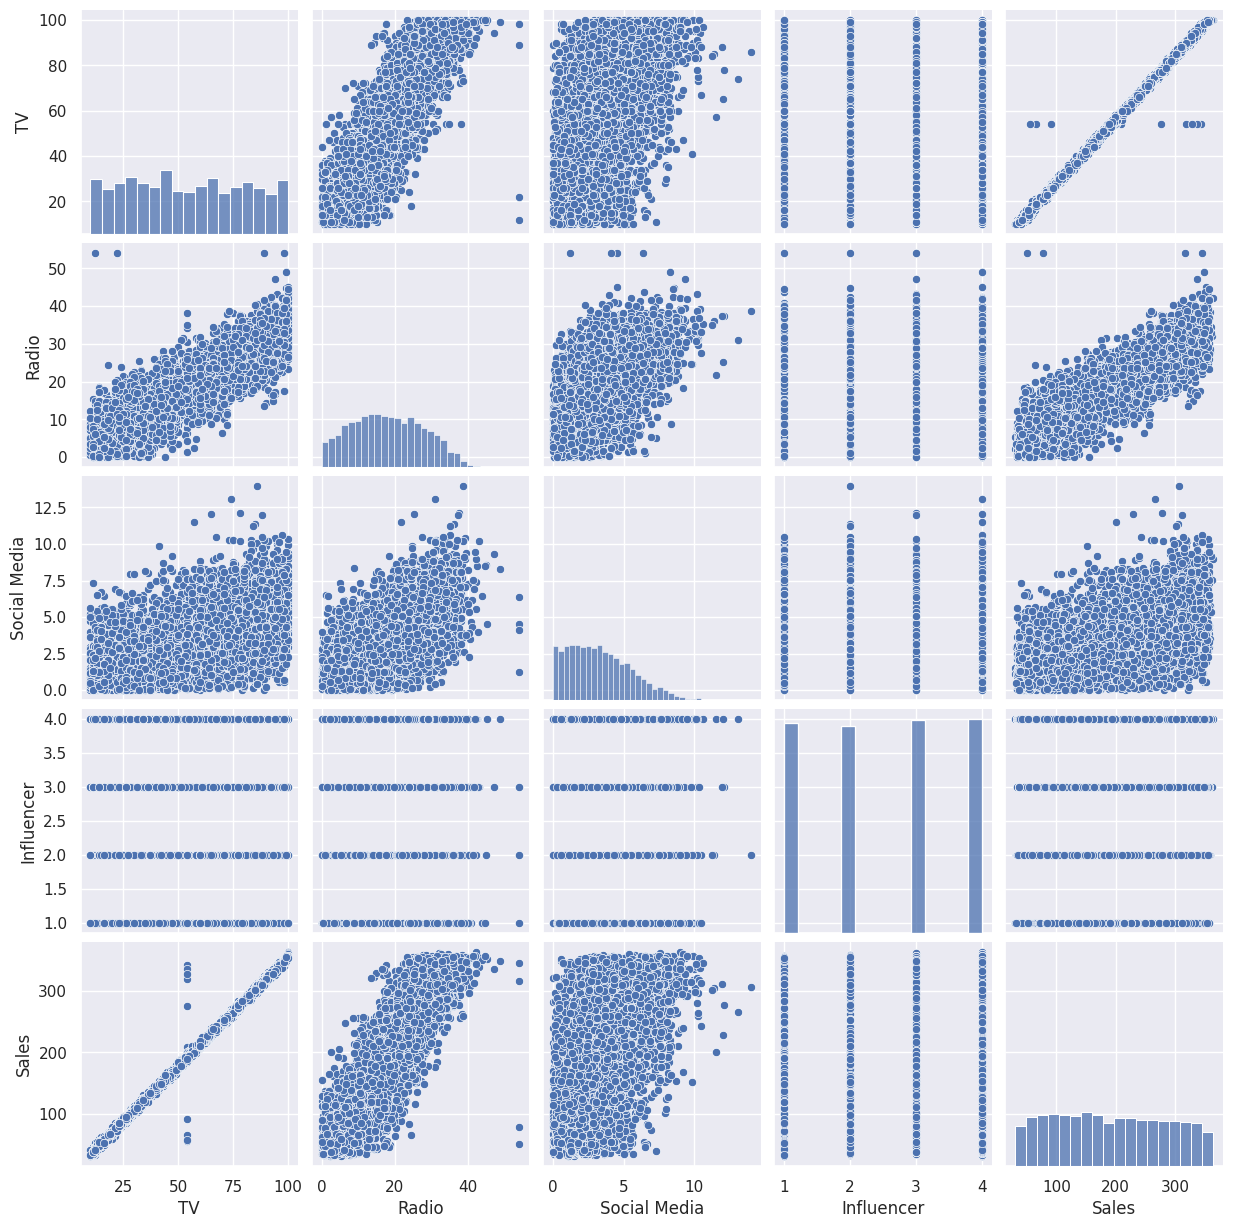

In [120]:
sns.pairplot(data)

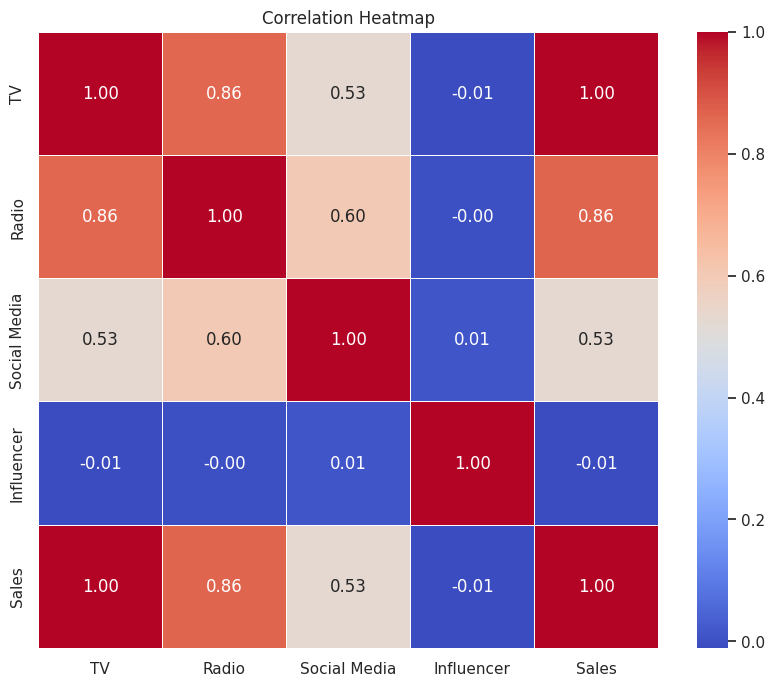

In [121]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

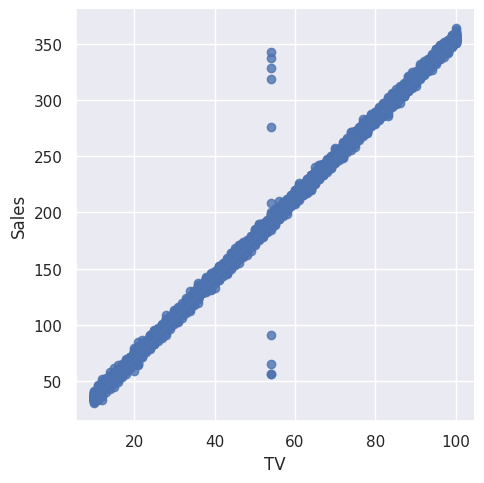

In [122]:
sns.lmplot(data[["TV", "Sales"]], x= 'TV', y= 'Sales')

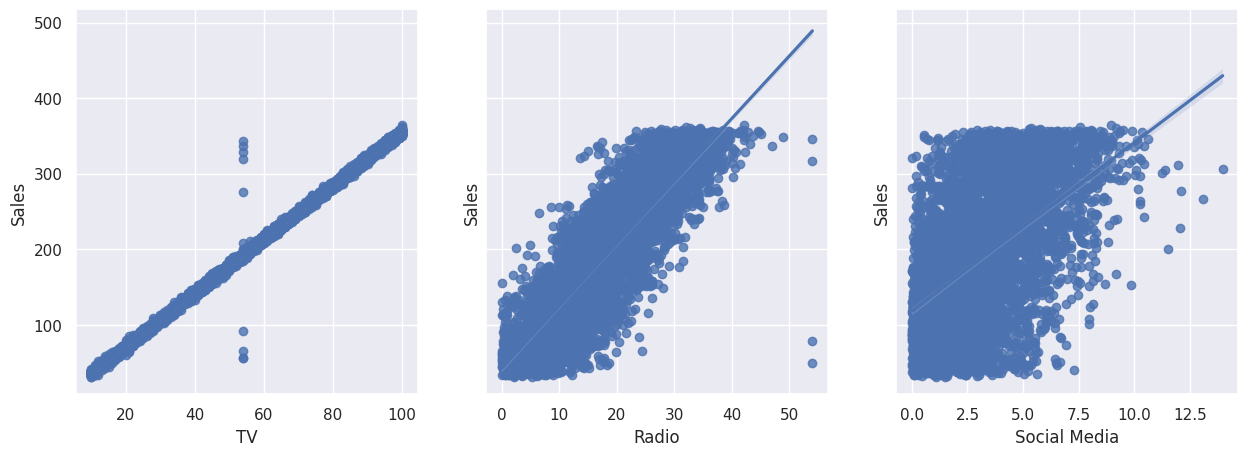

In [123]:
sns.set_style('whitegrid')
sns.set(font_scale=1)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey = True)
sns.regplot(ax=axs[0], x= 'TV', y= 'Sales', data = data[["TV", "Sales"]])
sns.regplot(ax=axs[1], x= 'Radio', y= 'Sales', data = data[["Radio", "Sales"]])
sns.regplot(ax=axs[2], x= 'Social Media', y= 'Sales', data = data[["Social Media", "Sales"]])
plt.show()

In [124]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [125]:
X = data[['TV',	'Radio',	'Social Media',	'Influencer']]
y = data['Sales']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [128]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10)
lm.fit(X_train,y_train)

LinearRegression(n_jobs=10)

In [129]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,3.530686
Radio,0.092296
Social Media,0.039561
Influencer,0.083673


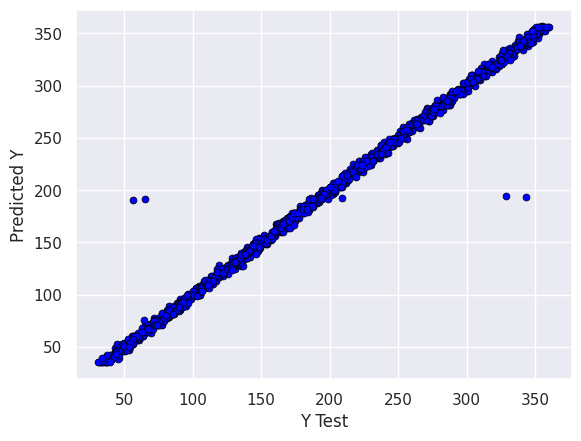

In [131]:
prediction = lm.predict(X_test)
plt.scatter(y_test,prediction,marker = ".", c = "#0000FF", s = 100, edgecolors= "black", lw=0.5, zorder=2)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.grid(zorder=1)
plt.show()

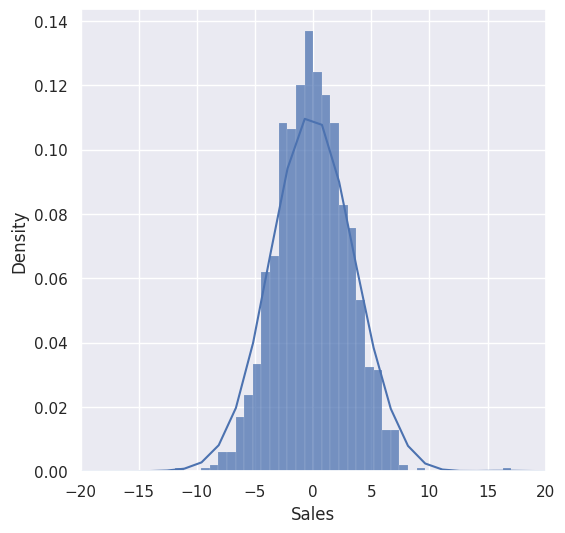

In [142]:
res = y_test-prediction

# Freedman-Diaconis rule for bin number calculation
q1 = res.quantile(0.25)
q3 = res.quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(res) ** (1 / 3))
bin_count = int(np.ceil((res.max() - res.min()) / bin_width))

plt.figure(figsize=(6, 6))
sns.histplot(res, stat = 'density', bins=bin_count, zorder=2)
plt.ylabel(None)
plt.xlim(-20,20)
sns.kdeplot(res, clip=None)
plt.grid(zorder=1)
plt.show()